#Pouya Shaeri
#400422105
This is **part 1** of the Data Mining Project

There are 2 stars in Table of Contents for the BONUS QUESTIONS

# **TASK 0** : Reading Data and Preprocess

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [130]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [131]:
train_df_original = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Mining/Project2/Part1/Dataset/train.csv')
train_df = train_df_original.copy()
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


4 kelas dar price range darim k be 2 kelase LowPrice (0) va HighPrice (1) tabdil mikonim

In [132]:
df_lowPrice0 = train_df[(train_df['price_range'] == 0)]
df_lowPrice1 = train_df[(train_df['price_range'] == 1)]
df_lowPrice = pd.concat([df_lowPrice0, df_lowPrice1])
print("LowPrice Shape: ", df_lowPrice.shape)
df_lowPrice.price_range = 0
df_lowPrice

LowPrice Shape:  (1000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
15,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,0
1984,797,0,2.2,1,0,0,37,0.9,144,7,...,206,1167,2216,9,5,6,1,0,0,0
1986,1139,1,0.9,1,6,1,58,0.5,161,2,...,742,999,1850,9,4,8,1,0,0,0
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,0


In [133]:
df_highPrice2 = train_df[(train_df['price_range'] == 2)]
df_highPrice3 = train_df[(train_df['price_range'] == 3)]
df_highPrice = pd.concat([df_highPrice2, df_highPrice3])
print("HighPrice Shape: ", df_highPrice.shape)
df_highPrice.price_range = 1
df_highPrice

HighPrice Shape:  (1000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
13,803,1,2.1,0,7,0,17,1.0,198,4,...,344,1440,2680,7,1,4,1,0,1,1
25,961,1,1.4,1,0,1,57,0.6,114,8,...,291,1434,2782,18,9,7,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,1
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,1
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1


In [134]:
train_df = pd.concat([df_lowPrice, df_highPrice])
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
15,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,1
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,1
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1


In [135]:
test_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Mining/Project2/Part1/Dataset/test.csv')
test_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


Sootoone 'id' ezafas

In [136]:
test_df.drop(columns = 'id',inplace = True)
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [137]:
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [138]:
test_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

👌👌 Missing nadarim va hameye Data Numerical ast. be in mani k Categorical ham nadarim.

In [139]:
train_df_nonZ = train_df.copy()

**Z-Score** - Outlier Detection

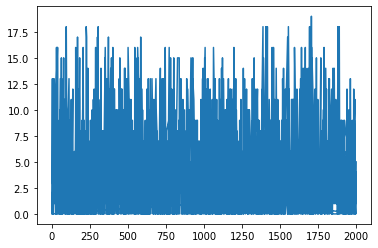

In [140]:
train_df.fc.plot()

In [141]:
# Remove outlier instances (considering the Numerical features)
# An instance is outlier if it's value is 3*std higher than mean (z-score = 3)
for col in train_df.columns:
  if train_df[col].dtype == 'int64' or train_df[col].dtype == 'float64':
    print('before', col, len(train_df), train_df[col].mean(), train_df[col].std())
    upper_range = train_df[col].mean() + 3 * train_df[col].std()
    lower_range = train_df[col].mean() - 3 * train_df[col].std()

    train_df = train_df[(train_df[col]>= lower_range) & (train_df[col]<= upper_range)]

    print('after', col, len(train_df), train_df[col].mean(), train_df[col].std())


before battery_power 2000 1238.5185 439.41820608353095
after battery_power 2000 1238.5185 439.41820608353095
before blue 2000 0.495 0.5001000400170029
after blue 2000 0.495 0.5001000400170029
before clock_speed 2000 1.5222500000000014 0.8160042088950716
after clock_speed 2000 1.5222500000000014 0.8160042088950716
before dual_sim 2000 0.5095 0.5000347661750046
after dual_sim 2000 0.5095 0.5000347661750046
before fc 2000 4.3095 4.341443747983878
after fc 1988 4.22635814889336 4.220050567308204
before four_g 1988 0.5206237424547284 0.4997001751072287
after four_g 1988 0.5206237424547284 0.4997001751072287
before int_memory 1988 32.089034205231385 18.128174760682253
after int_memory 1988 32.089034205231385 18.128174760682253
before m_dep 1988 0.502012072434609 0.2884384765614282
after m_dep 1988 0.502012072434609 0.2884384765614282
before mobile_wt 1988 140.15945674044266 35.36107838039017
after mobile_wt 1988 140.15945674044266 35.36107838039017
before n_cores 1988 4.5241448692152915 2.28

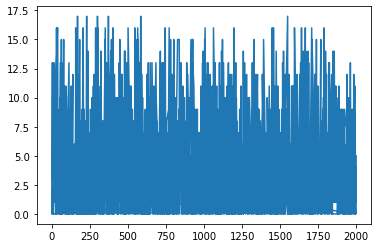

In [142]:
train_df.fc.plot()

Chon taghire Na mahsoosi dasht , Barmigardim be Ghable z-score

In [143]:
train_df = train_df_nonZ

In [144]:
train_df.shape

(2000, 21)

Categorical Encoding and Normalizing that We won't need 👇

In [145]:
# #delete a column if more than 50% of instances have null value
# to_be_deleted_cols = train_df.columns[train_df.isna().sum()/len(train_df) > 0.50]
# train_df.drop(columns=to_be_deleted_cols, inplace = True)
# print(train_df.shape)

# # Numerical Feature: If an instance has Nan value for a column, replace it with average value of that feature 
# features_mean_val = train_df._get_numeric_data().mean()
# train_df.fillna(features_mean_val, inplace = True)

# # Categorical Feature: If an instance has Nan value for a column, replace it with the value that is the most frequent
# for col in train_df.columns:
#   if train_df[col].dtype == 'object' or train_df[col].dtype == 'bool':
#     highest_count = train_df[col].value_counts().index[0]
#     print('Column: {}, Most frequent value: {}'.format(col, highest_count))
#     train_df[col].fillna(highest_count, inplace = True)
  

# # Find categorical features that have too many (50+) possible values and remove them
# col_w_too_vals = []
# for col in train_df.columns:
#     if train_df[col].dtype == 'object' or train_df[col].dtype == 'bool':
#       if train_df[col].nunique() >=50:
#         col_w_too_vals.append(col)
#         print('cols : {} , # of unique values : {}'.format(col, train_df[col].nunique()))

# train_df = train_df.drop(columns=col_w_too_vals)

# # normalize
# for cols in train_df.columns:
#   if train_df[cols].dtype == 'int64' or train_df[cols].dtype == 'float64':
#     if cols != 'price_range':
#       train_df[cols] = ((train_df[cols] - train_df[cols].mean())/train_df[cols].std())

# train_df.shape

#**TASK 1** : Forward Selection

Split and Scale data

In [146]:
y = train_df['price_range']
X = train_df.copy()
X.drop(columns='price_range', axis=1, inplace=True)

In [147]:
train_df['price_range'].value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [150]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(1600, 20)
(1600,)
(400, 20)
(1600,)


In [151]:
y_train.head()

331     0
679     0
1262    1
1292    0
911     0
Name: price_range, dtype: int64

In [152]:
scaler = StandardScaler()

In [153]:
fit_X = scaler.fit(X_train)

In [154]:
X_train = fit_X.transform(X_train)
X_test = fit_X.transform(X_test)

In [155]:
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)

In [156]:
def LR(X_train, y_train, X_test, y_test, i):
    LR = LogisticRegression()
    LR = LR.fit(X_train, y_train)
    yhat = LR.predict(X_test)
    y_pred = LR.predict_proba(X_test)[:, 1]
    acc = roc_auc_score(y_test, y_pred)
    if isinstance(i, int):
        #Forward, Backward selection we need acc
        if i == 22:
            return acc
        #pca we need acc
        elif 0 < i < 16:
            return acc
        #Inbalance data
        elif i == 0 :
            message = f"Accuracy of sklearn's Logistic Regression Classifier: {acc}"
            return (message, yhat)
        #predict test data we need model
        elif i == 23:
            return LR
    #all features ,ram
    else:
        message = f"Accuracy of sklearn's Logistic Regression Classifier with {i}: {acc}"
        return message, yhat

In [157]:
message, yhat = LR(X_train, y_train, X_test, y_test, "all_features")
print(message)
print(classification_report(y_test, yhat))

Accuracy of sklearn's Logistic Regression Classifier with all_features: 0.9997
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.99      0.98      0.98       200

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



Forward Selection

In [158]:
def forward(X_train, y_train, X_test, y_test, best_cols, all_cols):
    init_acc = 0
    for col in all_cols:
        best_cols.append(col)
        X_train_f = pd.DataFrame(data=X_train, columns=best_cols)
        X_test_f = pd.DataFrame(data=X_test, columns=best_cols)
        acc = LR(X_train_f, y_train, X_test_f, y_test, i=22)
        if acc > init_acc:
            init_acc = acc
        else:
            best_cols.pop()
    return(best_cols, init_acc)

In [159]:
best_cols, all_cols = [], X.columns.to_list()
forward_col = forward(X_train, y_train, X_test, y_test, best_cols, all_cols)
print(forward_col)

(['battery_power', 'dual_sim', 'm_dep', 'n_cores', 'px_height', 'ram', 'sc_w'], 0.9968250000000001)


# **TASK 2** : Logistic Classification on Forward Selection Features

In [160]:
X_train[forward_col[0]]

,battery_power,dual_sim,m_dep,n_cores,px_height,ram,sc_w
0,1.421379,-1.011314,-1.402439,0.660209,0.157067,-1.052584,-1.086860
1,-1.295803,-1.011314,1.359287,0.218967,-1.024999,-0.362883,-1.318508
2,0.432069,-1.011314,1.359287,1.101452,2.218863,1.641414,2.387850
3,0.277062,-1.011314,-0.712008,-0.222276,-0.795405,-0.765594,0.303024
4,0.092422,0.988813,1.359287,-1.104761,-1.097741,0.064824,-0.855213
...,...,...,...,...,...,...,...
1595,-1.076970,-1.011314,0.668856,-1.546004,2.423451,-0.461941,-0.623566
1596,0.698773,-1.011314,1.014072,-1.104761,-0.852235,0.195358,-1.086860
1597,-1.063293,-1.011314,1.359287,0.218967,-1.031818,1.628454,0.997966
1598,-1.678762,0.988813,-0.021576,1.101452,0.666265,-0.393434,-1.318508


In [161]:
message, yhat = LR(X_train[forward_col[0]], y_train, X_test[forward_col[0]], y_test, forward_col[0])
print(message)
print(classification_report(y_test, yhat))

Accuracy of sklearn's Logistic Regression Classifier with ['battery_power', 'dual_sim', 'm_dep', 'n_cores', 'px_height', 'ram', 'sc_w']: 0.9968250000000001
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       200
           1       0.98      0.95      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# ⭐ **BONUS TASK 1** : Implement Backward Selection and Logistic Classification on Backward Selection Features

Backward Selection

In [162]:
def backward(X_train, y_train, X_test, y_test, all_cols):
    init_acc = 0
    for i in range(len(all_cols)-1):
        col = all_cols.pop(0)
        X_train_b = pd.DataFrame(data=X_train, columns=all_cols)
        X_test_b = pd.DataFrame(data=X_test, columns=all_cols)
        acc = LR(X_train_b, y_train, X_test_b, y_test, i=22)
        if acc > init_acc:
            init_acc = acc
            all_cols.append(col)
    return(all_cols, init_acc)

In [163]:
all_cols = X.columns.to_list()
backward_col = backward(X_train, y_train, X_test, y_test, all_cols)
print(backward_col)

(['wifi', 'battery_power', 'blue', 'int_memory'], 0.9998)


Applying Logistic Classification

In [164]:
message, yhat = LR(X_train[backward_col[0]], y_train, X_test[backward_col[0]], y_test, backward_col[0])
print(message)
print(classification_report(y_test, yhat))

Accuracy of sklearn's Logistic Regression Classifier with ['wifi', 'battery_power', 'blue', 'int_memory']: 0.555475
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       200
           1       0.56      0.54      0.55       200

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400



Natije migirim k Raveshe Backward Selection ba Logistic Classification khoob Javab nemidahad.

# **TASK 3 & 4** : PCA

In [172]:
train_df = train_df_original.copy()
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [173]:
# An instance is outlier if it's value is 3*std higher than mean (z-score = 3)
for col in train_df.columns:
  if train_df[col].dtype == 'int64' or train_df[col].dtype == 'float64':
    print('before', col, len(train_df), train_df[col].mean(), train_df[col].std())
    upper_range = train_df[col].mean() + 3 * train_df[col].std()
    lower_range = train_df[col].mean() - 3 * train_df[col].std()

    train_df = train_df[(train_df[col]>= lower_range) & (train_df[col]<= upper_range)]

    print('after', col, len(train_df), train_df[col].mean(), train_df[col].std())


before battery_power 2000 1238.5185 439.4182060835312
after battery_power 2000 1238.5185 439.4182060835312
before blue 2000 0.495 0.5001000400170029
after blue 2000 0.495 0.5001000400170029
before clock_speed 2000 1.5222499999999983 0.8160042088950705
after clock_speed 2000 1.5222499999999983 0.8160042088950705
before dual_sim 2000 0.5095 0.5000347661750046
after dual_sim 2000 0.5095 0.5000347661750046
before fc 2000 4.3095 4.341443747983884
after fc 1988 4.22635814889336 4.2200505673082045
before four_g 1988 0.5206237424547284 0.4997001751072286
after four_g 1988 0.5206237424547284 0.4997001751072286
before int_memory 1988 32.089034205231385 18.128174760682242
after int_memory 1988 32.089034205231385 18.128174760682242
before m_dep 1988 0.5020120724346092 0.28843847656142807
after m_dep 1988 0.5020120724346092 0.28843847656142807
before mobile_wt 1988 140.15945674044266 35.3610783803902
after mobile_wt 1988 140.15945674044266 35.3610783803902
before n_cores 1988 4.5241448692152915 2.2

In [174]:
# normalize
for cols in train_df.columns:
  if train_df[cols].dtype == 'int64' or train_df[cols].dtype == 'float64':
    if cols != 'price_range':
      train_df[cols] = ((train_df[cols] - train_df[cols].mean())/train_df[cols].std())

train_df.shape

(1988, 21)

In [175]:
features = list(train_df.columns)[:-1]

X = train_df[features]
y = train_df["price_range"]

In [176]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from copy import deepcopy

def logistic_regression(X, y, train_size=.8):  

  train_size = int(train_size * len(X))

  X_train = deepcopy(X[:train_size])
  y_train = deepcopy(y[:train_size])

  X_test = deepcopy(X[train_size:])
  y_test = deepcopy(y[train_size:])

  clf = LogisticRegression().fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(precision_recall_fscore_support(y_test, y_pred, average=None))

In [177]:
logistic_regression(X.values, y.values)

(array([0.98      , 0.92380952, 0.95652174, 0.98019802]), array([0.96078431, 0.95098039, 0.93617021, 0.99      ]), array([0.97029703, 0.93719807, 0.94623656, 0.98507463]), array([102, 102,  94, 100]))


In [178]:
# Logistic regression with PCA
from sklearn.decomposition import PCA

X_pca = PCA(n_components=7).fit_transform(X)

logistic_regression(X_pca, y)

(array([0.52173913, 0.30508475, 0.21590909, 0.51470588]), array([0.58823529, 0.17647059, 0.20212766, 0.7       ]), array([0.55299539, 0.22360248, 0.20879121, 0.59322034]), array([102, 102,  94, 100]))


# **TASK 6** : SVM

In [179]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from copy import deepcopy

# Args
# multiclass_decision={'ovo' -- one vs one, 'ovr' -- one vs rest}, default = 'ovr'
# kernel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default = 'rbf'
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ = {‘scale’, ‘auto’}, default = 'scale'
def svm_w_kernel(X, y, kernel='rbf', gamma = 'scale', C = 1,
                 multiclass_decision='ovr', train_size=.8, print_f1 = True):  

  train_size = int(train_size * len(X))

  X_train = deepcopy(X[:train_size])
  y_train = deepcopy(y[:train_size])

  X_test = deepcopy(X[train_size:])
  y_test = deepcopy(y[train_size:])

  
  clf = SVC(kernel = kernel, gamma = gamma, C = C,
            decision_function_shape = multiclass_decision)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  p, r, f, s = precision_recall_fscore_support(y_test, y_pred, average=None)

  if kernel in ('poly', 'rbf', 'sigmoid'):
    print('SVM results for kernel {} and Kernel coeff {}--'.format(kernel, gamma), 'accuracy: ', clf.score(X_test, y_test))
    if print_f1:
      print('Precision: ', round(np.mean(p), 4), p)
      print('Recall: ', round(np.mean(r),4), r)
      print('Fscore: ', round(np.mean(f),4), f)
  else:
    print('SVM results for kernel {}--'.format(kernel), 'accuracy: ', clf.score(X_test, y_test))
    if print_f1:
      print('Precision: ', round(np.mean(p), 4), p)
      print('Recall: ', round(np.mean(r),4), r)
      print('Fscore: ', round(np.mean(f),4), f)


# **TASK 7**

In [180]:
# SVM for 4 classes: One vs One
for kernel in ('linear','poly', 'rbf', 'sigmoid'):
  if kernel in ('poly', 'rbf', 'sigmoid'):
    for gamma in ('auto', 'scale'):
      svm_w_kernel(X[features].values, y.values, kernel, gamma, multiclass_decision = 'ovo',train_size = 0.8)
      print('=========================')
  else:
    svm_w_kernel(X[features].values, y.values, kernel, multiclass_decision = 'ovo', train_size=0.8)
    print('=========================')

SVM results for kernel linear-- accuracy:  0.9723618090452262
Precision:  0.9723 [0.99019608 0.95192308 0.96703297 0.98019802]
Recall:  0.9717 [0.99019608 0.97058824 0.93617021 0.99      ]
Fscore:  0.9719 [0.99019608 0.96116505 0.95135135 0.98507463]
SVM results for kernel poly and Kernel coeff auto-- accuracy:  0.7914572864321608
Precision:  0.8033 [0.89583333 0.7029703  0.66086957 0.95348837]
Recall:  0.7919 [0.84313725 0.69607843 0.80851064 0.82      ]
Fscore:  0.7943 [0.86868687 0.69950739 0.72727273 0.88172043]
SVM results for kernel poly and Kernel coeff scale-- accuracy:  0.7914572864321608
Precision:  0.8033 [0.89583333 0.7029703  0.66086957 0.95348837]
Recall:  0.7919 [0.84313725 0.69607843 0.80851064 0.82      ]
Fscore:  0.7943 [0.86868687 0.69950739 0.72727273 0.88172043]
SVM results for kernel rbf and Kernel coeff auto-- accuracy:  0.8819095477386935
Precision:  0.8834 [0.92929293 0.80188679 0.83333333 0.96907216]
Recall:  0.8816 [0.90196078 0.83333333 0.85106383 0.94      

In [181]:
# SVM for 4 classes: One vs Rest
for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
  if kernel in ('poly', 'rbf', 'sigmoid'):
    for gamma in ('auto', 'scale'):
      svm_w_kernel(X[features].values, y.values, kernel, gamma, multiclass_decision ='ovr', train_size=0.8)
      print('=========================')
  else:
    svm_w_kernel(X[features].values, y.values, kernel, multiclass_decision ='ovr', train_size= 0.8)
    print('=========================')

SVM results for kernel linear-- accuracy:  0.9723618090452262
Precision:  0.9723 [0.99019608 0.95192308 0.96703297 0.98019802]
Recall:  0.9717 [0.99019608 0.97058824 0.93617021 0.99      ]
Fscore:  0.9719 [0.99019608 0.96116505 0.95135135 0.98507463]
SVM results for kernel poly and Kernel coeff auto-- accuracy:  0.7914572864321608
Precision:  0.8033 [0.89583333 0.7029703  0.66086957 0.95348837]
Recall:  0.7919 [0.84313725 0.69607843 0.80851064 0.82      ]
Fscore:  0.7943 [0.86868687 0.69950739 0.72727273 0.88172043]
SVM results for kernel poly and Kernel coeff scale-- accuracy:  0.7914572864321608
Precision:  0.8033 [0.89583333 0.7029703  0.66086957 0.95348837]
Recall:  0.7919 [0.84313725 0.69607843 0.80851064 0.82      ]
Fscore:  0.7943 [0.86868687 0.69950739 0.72727273 0.88172043]
SVM results for kernel rbf and Kernel coeff auto-- accuracy:  0.8819095477386935
Precision:  0.8834 [0.92929293 0.80188679 0.83333333 0.96907216]
Recall:  0.8816 [0.90196078 0.83333333 0.85106383 0.94      

# **TASK 8 : Soft margin vs Hard margin**

The lower the C is, the lower regularization is, and the less punishment we have for missclassification => Softer margin

*   Softer margin: Lower C
*   Hard margin: Larger C--> 1e10



In [182]:
# SVM for 4 classes: One vs Rest
for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
  print('Soft Margin, C = 0.0001')
  svm_w_kernel(X[features].values, y.values, kernel, C = 0.0001, multiclass_decision ='ovr', train_size=0.8)
  
  print('Soft Margin, C = 0.001')
  svm_w_kernel(X[features].values, y.values, kernel, C = 0.001, multiclass_decision ='ovr', train_size=0.8)

  print('Soft Margin, C = 0.1')
  svm_w_kernel(X[features].values, y.values, kernel, C = 0.1, multiclass_decision = 'ovr', train_size=0.8)

  print('Soft Margin, C = 1')
  svm_w_kernel(X[features].values, y.values, kernel, C = 1, multiclass_decision = 'ovr', train_size=0.8)
  
  print('Soft Margin, C = 10')
  svm_w_kernel(X[features].values, y.values, kernel, C = 10, multiclass_decision ='ovr', train_size=0.8)

  print('Soft Margin, C = 100')
  svm_w_kernel(X[features].values, y.values, kernel, C = 100, multiclass_decision ='ovr', train_size=0.8)
  
  print('Hard Margin')
  svm_w_kernel(X[features].values, y.values, kernel, C = 1e5,multiclass_decision= 'ovr', train_size=0.8)
  print('=========================')


Soft Margin, C = 0.0001
SVM results for kernel linear-- accuracy:  0.23618090452261306
Precision:  0.059 [0.        0.        0.2361809 0.       ]
Recall:  0.25 [0. 0. 1. 0.]
Fscore:  0.0955 [0.         0.         0.38211382 0.        ]
Soft Margin, C = 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM results for kernel linear-- accuracy:  0.5100502512562815
Precision:  0.5874 [0.70093458 0.24324324 0.40528634 1.        ]
Recall:  0.5181 [0.73529412 0.08823529 0.9787234  0.27      ]
Fscore:  0.4614 [0.71770335 0.1294964  0.57320872 0.42519685]
Soft Margin, C = 0.1
SVM results for kernel linear-- accuracy:  0.9472361809045227
Precision:  0.9479 [0.98979592 0.90740741 0.93406593 0.96039604]
Recall:  0.9465 [0.95098039 0.96078431 0.90425532 0.97      ]
Fscore:  0.9469 [0.97       0.93333333 0.91891892 0.96517413]
Soft Margin, C = 1
SVM results for kernel linear-- accuracy:  0.9723618090452262
Precision:  0.9723 [0.99019608 0.95192308 0.96703297 0.98019802]
Recall:  0.9717 [0.99019608 0.97058824 0.93617021 0.99      ]
Fscore:  0.9719 [0.99019608 0.96116505 0.95135135 0.98507463]
Soft Margin, C = 10
SVM results for kernel linear-- accuracy:  0.964824120603015
Precision:  0.9651 [0.99       0.93396226 0.94680851 0.98979592]
Recall:  0.9645 [0.97058824 0.97058824 0.94680851 0.97      ]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM results for kernel poly and Kernel coeff scale-- accuracy:  0.23618090452261306
Precision:  0.059 [0.        0.        0.2361809 0.       ]
Recall:  0.25 [0. 0. 1. 0.]
Fscore:  0.0955 [0.         0.         0.38211382 0.        ]
Soft Margin, C = 0.001
SVM results for kernel poly and Kernel coeff scale-- accuracy:  0.23618090452261306
Precision:  0.059 [0.        0.        0.2361809 0.       ]
Recall:  0.25 [0. 0. 1. 0.]
Fscore:  0.0955 [0.         0.         0.38211382 0.        ]
Soft Margin, C = 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM results for kernel poly and Kernel coeff scale-- accuracy:  0.5301507537688442
Precision:  0.6602 [0.86666667 0.40740741 0.36653386 1.        ]
Recall:  0.5378 [0.76470588 0.10784314 0.9787234  0.3       ]
Fscore:  0.4945 [0.8125     0.17054264 0.53333333 0.46153846]
Soft Margin, C = 1
SVM results for kernel poly and Kernel coeff scale-- accuracy:  0.7914572864321608
Precision:  0.8033 [0.89583333 0.7029703  0.66086957 0.95348837]
Recall:  0.7919 [0.84313725 0.69607843 0.80851064 0.82      ]
Fscore:  0.7943 [0.86868687 0.69950739 0.72727273 0.88172043]
Soft Margin, C = 10
SVM results for kernel poly and Kernel coeff scale-- accuracy:  0.7738693467336684
Precision:  0.7812 [0.85148515 0.66346154 0.66666667 0.94318182]
Recall:  0.7736 [0.84313725 0.67647059 0.74468085 0.83      ]
Fscore:  0.7759 [0.84729064 0.66990291 0.70351759 0.88297872]
Soft Margin, C = 100
SVM results for kernel poly and Kernel coeff scale-- accuracy:  0.7713567839195979
Precision:  0.7806 [0.84158416 0.65420561

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.23618090452261306
Precision:  0.059 [0.        0.        0.2361809 0.       ]
Recall:  0.25 [0. 0. 1. 0.]
Fscore:  0.0955 [0.         0.         0.38211382 0.        ]
Soft Margin, C = 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.23618090452261306
Precision:  0.059 [0.        0.        0.2361809 0.       ]
Recall:  0.25 [0. 0. 1. 0.]
Fscore:  0.0955 [0.         0.         0.38211382 0.        ]
Soft Margin, C = 0.1
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.6658291457286433
Precision:  0.7263 [0.87209302 0.57142857 0.4939759  0.96774194]
Recall:  0.6696 [0.73529412 0.47058824 0.87234043 0.6       ]
Fscore:  0.6714 [0.79787234 0.51612903 0.63076923 0.74074074]
Soft Margin, C = 1
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
Precision:  0.8834 [0.92929293 0.80188679 0.83333333 0.96907216]
Recall:  0.8816 [0.90196078 0.83333333 0.85106383 0.94      ]
Fscore:  0.8823 [0.91542289 0.81730769 0.84210526 0.95431472]
Soft Margin, C = 10
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8894472361809045
Precision:  0.8882 [0.93203883 0.84848485 0.83157895 0.94059406]
Recall:  0.8888 [0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM results for kernel sigmoid and Kernel coeff scale-- accuracy:  0.23618090452261306
Precision:  0.059 [0.        0.        0.2361809 0.       ]
Recall:  0.25 [0. 0. 1. 0.]
Fscore:  0.0955 [0.         0.         0.38211382 0.        ]
Soft Margin, C = 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM results for kernel sigmoid and Kernel coeff scale-- accuracy:  0.23618090452261306
Precision:  0.059 [0.        0.        0.2361809 0.       ]
Recall:  0.25 [0. 0. 1. 0.]
Fscore:  0.0955 [0.         0.         0.38211382 0.        ]
Soft Margin, C = 0.1
SVM results for kernel sigmoid and Kernel coeff scale-- accuracy:  0.8592964824120602
Precision:  0.8717 [0.94623656 0.76923077 0.77142857 1.        ]
Recall:  0.8592 [0.8627451  0.88235294 0.86170213 0.83      ]
Fscore:  0.8614 [0.9025641  0.82191781 0.81407035 0.90710383]
Soft Margin, C = 1
SVM results for kernel sigmoid and Kernel coeff scale-- accuracy:  0.9271356783919598
Precision:  0.928 [0.97       0.87850467 0.88421053 0.97916667]
Recall:  0.9265 [0.95098039 0.92156863 0.89361702 0.94      ]
Fscore:  0.927 [0.96039604 0.89952153 0.88888889 0.95918367]
Soft Margin, C = 10
SVM results for kernel sigmoid and Kernel coeff scale-- accuracy:  0.871859296482412
Precision:  0.8733 [0.95918367 0.82407407 0.78350515 0.92631579]
Recal

# **TASK 9 & 10 : Feature Engineering and SVM**

In [183]:
X.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.900100,-0.990737,0.829895,-1.018019,-0.764531,-1.041872,-1.383980,0.339719,1.352915,-1.102256,-1.301961,-1.408536,-1.146843,0.389652,-0.784783,0.281646,1.462691,-1.781817,-1.004790,0.989741
1,-0.492818,1.008842,-1.251370,0.981805,-1.001495,0.959328,1.153506,0.686413,-0.117628,-0.665571,-0.639229,0.589382,1.704436,0.465285,1.112919,-0.635491,-0.735354,0.560942,0.994732,-1.009857


In [184]:
features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [185]:
X['battery_power'].min(), X['battery_power'].max(), X['battery_power'].mean()

(-1.6759840980068181, 1.7301682764616781, 3.1385580474815796e-17)

In [186]:
X['batter_power_5_bins'], bins_5 = pd.cut(X['battery_power'], 5, retbins = True, labels=range(5))#labels = range(10)
X['batter_power_10_bins'], bins_10 = pd.cut(X['battery_power'], 10, retbins = True, labels = range(10))#labels = range(10)


In [187]:
bins_5

array([-1.67939025, -0.99475362, -0.31352315,  0.36770733,  1.0489378 ,
        1.73016828])

In [188]:
X['batter_power_unequal_5_bins'], bins_5_unequal = pd.cut(X['battery_power'],
                                                          bins = [-1.67939025, -1.2, -0.3, 0, 1.6, 1.73016828 ],
                                                          retbins = True, labels = range(5))

In [189]:
print('=========== 5 equal bins ============')
new_f = features[1:]+['batter_power_5_bins']
svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8)
print('========================')

print('=========== 10 equal bins ============')
new_f = features[1:]+['batter_power_10_bins']
svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8)
print('========================')


print('=========== 5 unequal bins ============')
new_f = features[1:]+['batter_power_unequal_5_bins']
svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8)
print('========================')

=========== 5 equal bins ============
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8894472361809045
Precision:  0.8925 [0.91919192 0.81308411 0.84848485 0.98924731]
Recall:  0.8897 [0.89215686 0.85294118 0.89361702 0.92      ]
Fscore:  0.8905 [0.90547264 0.83253589 0.87046632 0.95336788]
=========== 10 equal bins ============
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8844221105527639
Precision:  0.8872 [0.93684211 0.82242991 0.83168317 0.95789474]
Recall:  0.8847 [0.87254902 0.8627451  0.89361702 0.91      ]
Fscore:  0.8851 [0.9035533  0.84210526 0.86153846 0.93333333]
=========== 5 unequal bins ============
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8768844221105527
Precision:  0.8779 [0.89320388 0.80582524 0.84375    0.96875   ]
Recall:  0.8768 [0.90196078 0.81372549 0.86170213 0.93      ]
Fscore:  0.8772 [0.89756098 0.8097561  0.85263158 0.94897959]


**One hot Encoding**

In [190]:
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [191]:
for f in categorical_features:
  X[f] = X[f].astype('category')

In [192]:
X_w_dummies = pd.get_dummies(X, sparse=True)

In [193]:
X_w_dummies.head(2)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,batter_power_10_bins_5,batter_power_10_bins_6,batter_power_10_bins_7,batter_power_10_bins_8,batter_power_10_bins_9,batter_power_unequal_5_bins_0,batter_power_unequal_5_bins_1,batter_power_unequal_5_bins_2,batter_power_unequal_5_bins_3,batter_power_unequal_5_bins_4
0,-0.900100,0.829895,-0.764531,-1.383980,0.339719,1.352915,-1.102256,-1.301961,-1.408536,-1.146843,...,0,0,0,0,0,0,1,0,0,0
1,-0.492818,-1.251370,-1.001495,1.153506,0.686413,-0.117628,-0.665571,-0.639229,0.589382,1.704436,...,0,0,0,0,0,0,1,0,0,0


In [194]:
svm_w_kernel(X_w_dummies.values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8)

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8869346733668342
Precision:  0.889 [0.9375     0.82857143 0.83168317 0.95833333]
Recall:  0.8872 [0.88235294 0.85294118 0.89361702 0.92      ]
Fscore:  0.8875 [0.90909091 0.84057971 0.86153846 0.93877551]


**Transformations**

In [195]:
train_df_org = train_df_original.copy()
train_df_org.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [196]:
svm_w_kernel(X[features].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8)

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
Precision:  0.8834 [0.92929293 0.80188679 0.83333333 0.96907216]
Recall:  0.8816 [0.90196078 0.83333333 0.85106383 0.94      ]
Fscore:  0.8823 [0.91542289 0.81730769 0.84210526 0.95431472]


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp2
  result = getattr(ufunc, method)(*inputs, **kwargs)


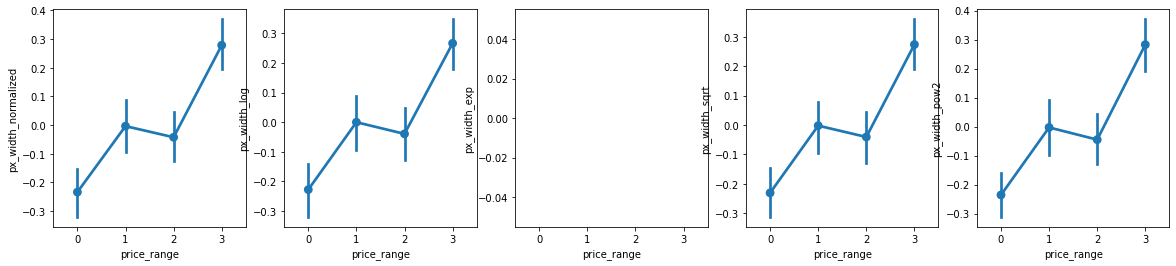

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8969849246231156
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8894472361809045
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935


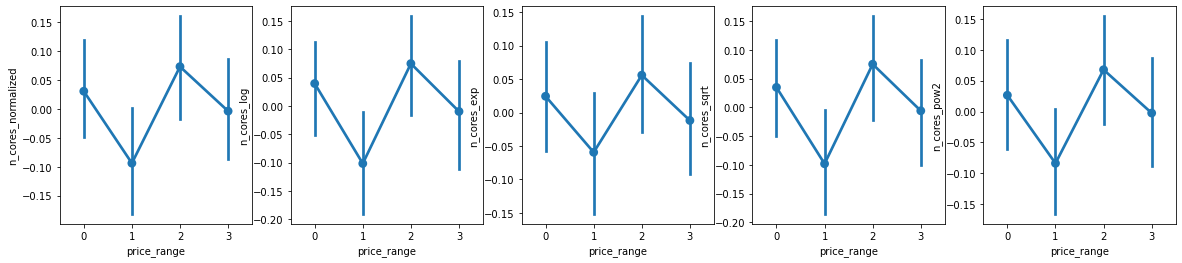

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8894472361809045
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8944723618090452
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8869346733668342


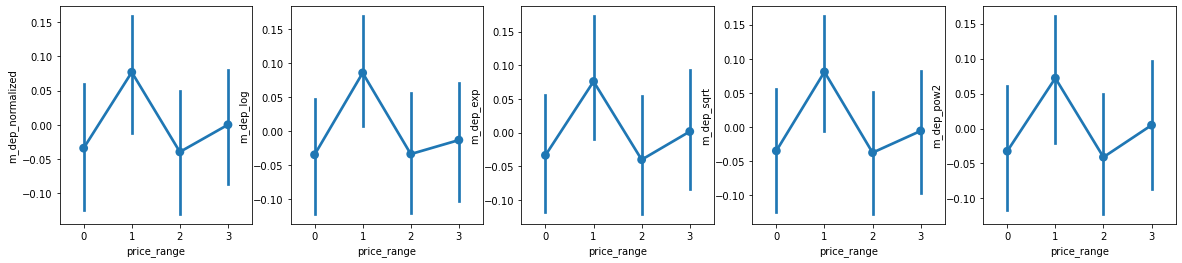

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8844221105527639
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8844221105527639
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


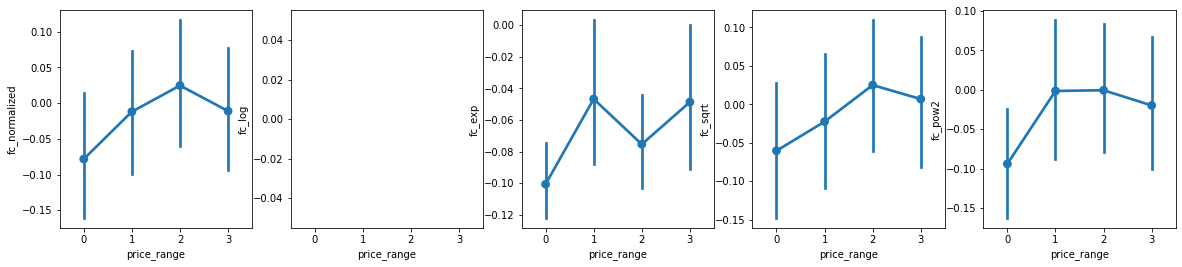

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8944723618090452
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8793969849246231
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8919597989949749


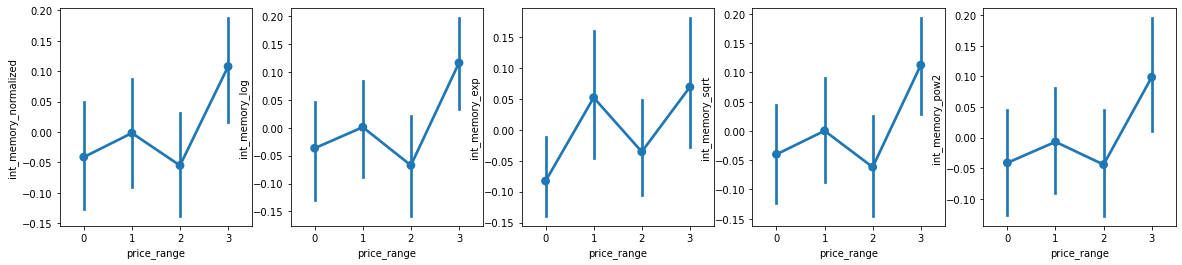

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8693467336683417
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.871859296482412
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.871859296482412
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp2
  result = getattr(ufunc, method)(*inputs, **kwargs)


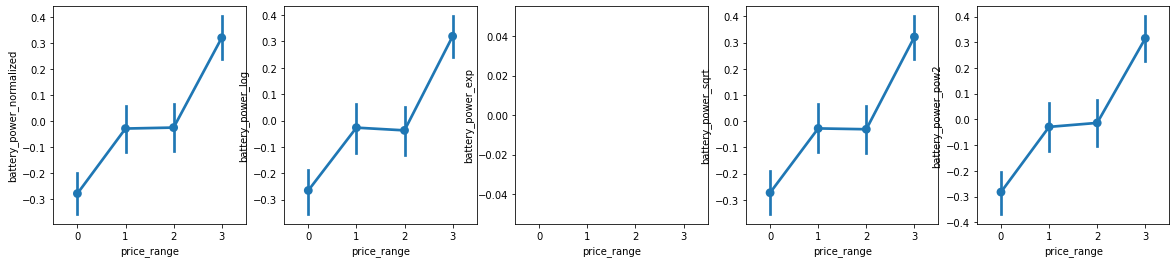

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8768844221105527
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8844221105527639
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp2
  result = getattr(ufunc, method)(*inputs, **kwargs)


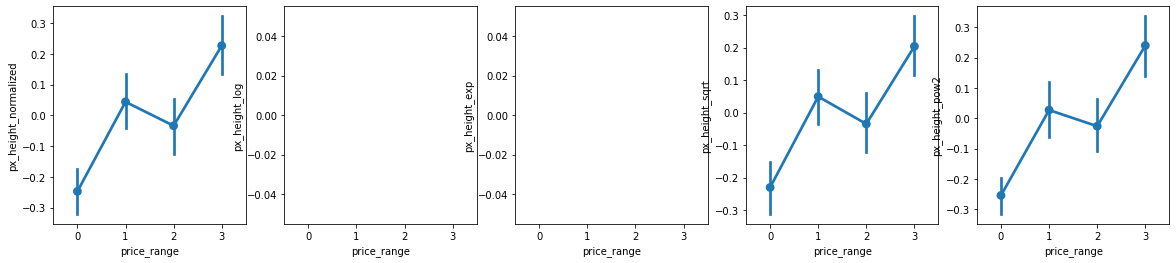

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8869346733668342
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8743718592964824


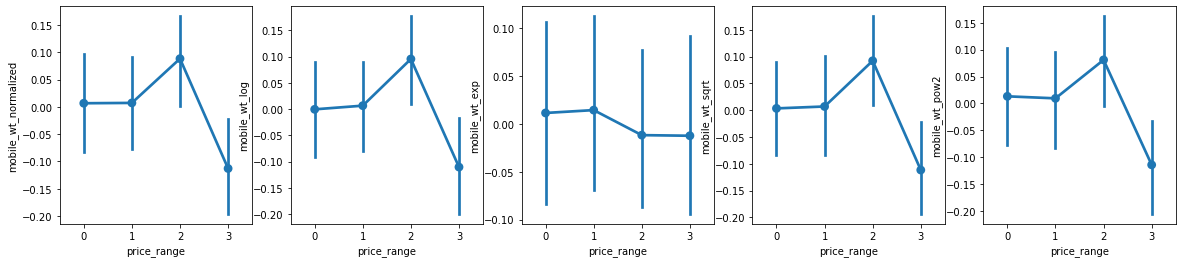

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.871859296482412
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8793969849246231


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


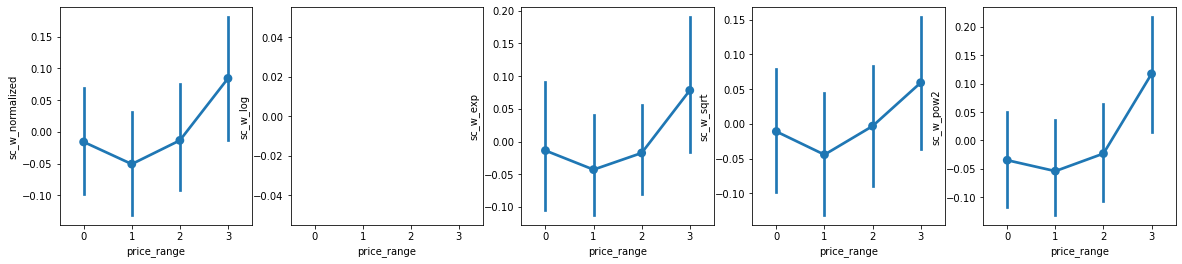

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8919597989949749
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935


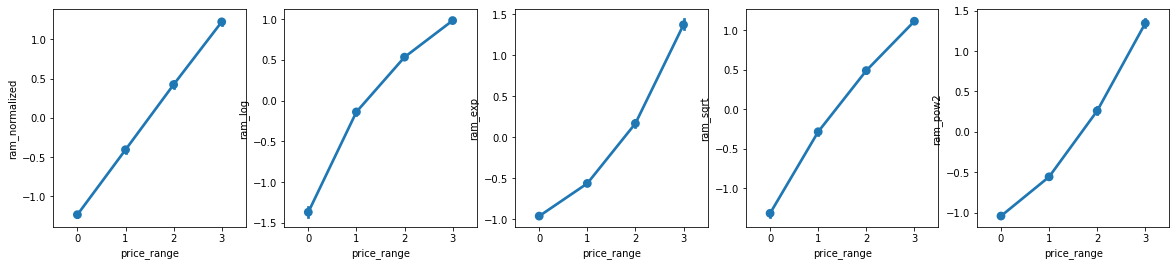

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8090452261306532
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8291457286432161
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.864321608040201
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8542713567839196


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


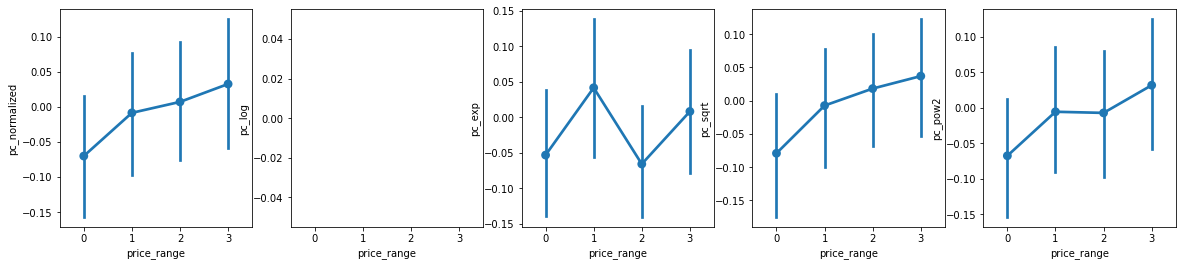

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8768844221105527
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8768844221105527
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8793969849246231


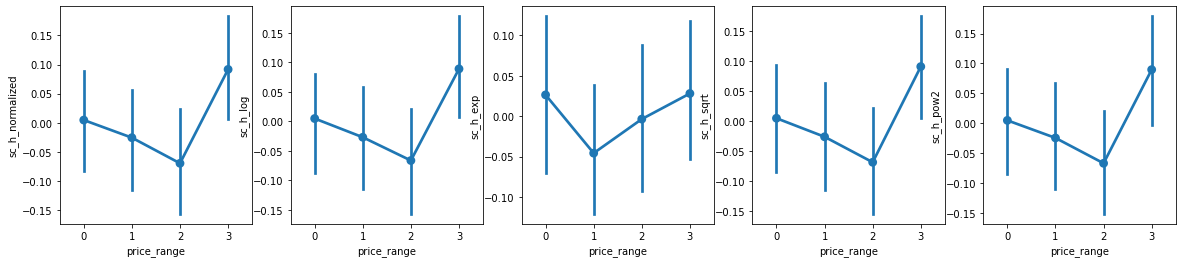

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8869346733668342
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8793969849246231
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8844221105527639
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935


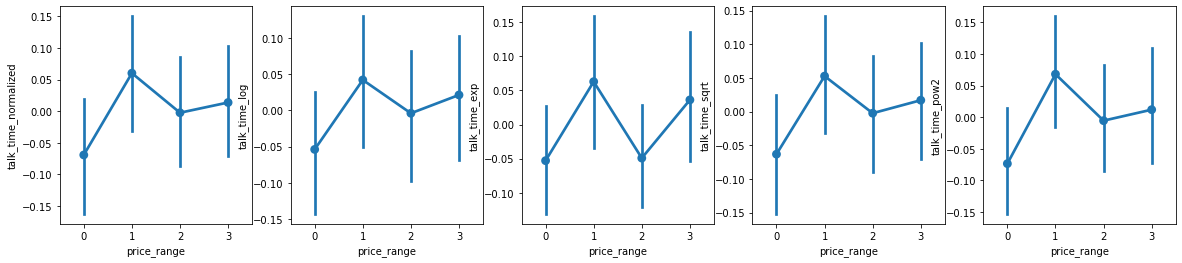

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8768844221105527
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8844221105527639


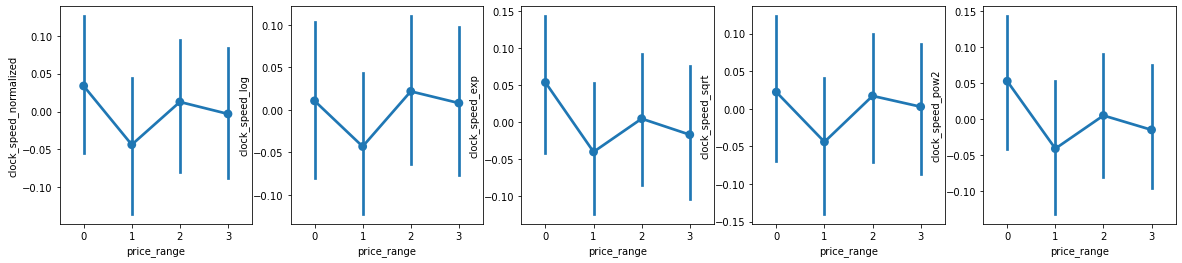

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8793969849246231
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8844221105527639
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8819095477386935
SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8844221105527639


In [197]:
for f in list(set(features) - set(categorical_features)):
  fig, ax = plt.subplots(1,5, figsize=(20, 4))
  
  f_val = train_df_org[f]
  if f == 'ram': f_val = f_val/1024 
  

  X.loc[:,f+'_normalized'] = ((f_val - f_val.mean())/f_val.std())
  sns.pointplot(y=X[f+'_normalized'], x=y, ax=ax[0])

  z = np.log(f_val)
  X.loc[:,f+'_log'] = ((z - z.mean())/z.std())
  #ax[1].scatter(zz, train_df_org['price_range'])
  sns.pointplot(y=X[f+'_log'], x=y, ax=ax[1])
  #ax[1].set_xlabel(f)

  z1 = np.exp2(f_val)
  X.loc[:,f+'_exp'] = ((z1 - z1.mean())/z1.std())
  #ax[2].scatter(zz1, train_df_org['price_range'])
  sns.pointplot(y=X[f+'_exp'], x=y, ax=ax[2])
  #ax[2].set_xlabel(f)

  z2 = np.sqrt(f_val)
  X.loc[:,f+'_sqrt'] = ((z2 - z2.mean())/z2.std())
  #ax[2].scatter(zz1, train_df_org['price_range'])
  sns.pointplot(y=X[f+'_sqrt'], x=y, ax=ax[3])

  z3 = f_val*f_val
  X.loc[:,f+'_pow2'] = ((z3 - z3.mean())/z3.std())
  #ax[2].scatter(zz1, train_df_org['price_range'])
  sns.pointplot(y=X[f+'_pow2'], x=y, ax=ax[4])

  plt.show()
  f_idx = features.index(f)

  if X[f+'_log'].isnull().sum()==0:
    new_f = features[:f_idx]+features[f_idx+1:]+[f+'_log']
    svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8, print_f1 = False)

  if X[f+'_exp'].isnull().sum()==0:
    new_f = features[:f_idx]+features[f_idx+1:]+[f+'_exp']
    svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8, print_f1 = False)

  new_f = features[:f_idx]+features[f_idx+1:]+[f+'_sqrt']
  svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8, print_f1 = False)

  new_f = features[:f_idx]+features[f_idx+1:]+[f+'_pow2']
  svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8, print_f1 = False)
  print('========================')


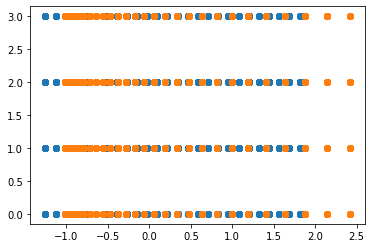

In [198]:
plt.scatter(X['clock_speed_normalized'], y)
plt.scatter(X['clock_speed_exp'], y)



*   clock_speed: exp2 accuracy is 0.9 (vs 0.8875). The reason is that instances in class 0 is now slightly more distinguishable than those in classes 3 & 4 (look at instances in [0.1, 0.15] after transformation and normalization for class 0, before it was less than 0.10 that could be messed with those from classes 3 & 4
*  n_cores: by exp, when we use exp transformation, instances with higher cores have higher price and would get higher values for this feature and gets more distinguishable than instances in other classes
*   fc: by sqrt, class 0,1 got more distinguishable than classes 3 & 4 (0.9 vs 0.8875)
*   sc_w: by exp class 0 becomes more distinguishable than class 2 (look at high end ranges of instances in class 0, prviously it has overlap with the ranges in class 2, but now its more separable)



In [199]:
X['area_pixel'] = X['px_height'] * X['px_width']
idx1, idx2 = features.index('px_height'), features.index('px_width')
idx1, idx2

(11, 12)

In [200]:
new_f = features[:idx1]+features[idx2+1:]+['area_pixel']
svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8)
print('========================')

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.7788944723618091
Precision:  0.7787 [0.88541667 0.69444444 0.68888889 0.84615385]
Recall:  0.7771 [0.83333333 0.73529412 0.65957447 0.88      ]
Fscore:  0.7774 [0.85858586 0.71428571 0.67391304 0.8627451 ]


**Add Area Feature**

In [201]:
X['area'] = X['sc_h'] * X['sc_w']
idx1, idx2 = features.index('sc_h'), features.index('sc_w')
idx1, idx2

(14, 15)

In [202]:
new_f = features[:idx1]+features[idx2+1:]+['area']
svm_w_kernel(X[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8)
print('========================')

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.8743718592964824
Precision:  0.876 [0.92929293 0.79816514 0.82795699 0.94845361]
Recall:  0.8735 [0.90196078 0.85294118 0.81914894 0.92      ]
Fscore:  0.8744 [0.91542289 0.82464455 0.82352941 0.93401015]


**OneHotEncoding Features + Area + Bins + Transformation**

In [203]:
X_w_dummies.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'blue_-0.9907370224333465',
       'blue_1.008841861421976', 'dual_sim_-1.0180194859856009',
       'dual_sim_0.9818053540730697', 'four_g_-1.0418722433767607',
       'four_g_0.9593277757855583', 'three_g_-1.7818172650437252',
       'three_g_0.5609424723285802', 'touch_screen_-1.004790087143012',
       'touch_screen_0.9947321283127514', 'wifi_-1.0098573964664748',
       'wifi_0.9897407152619635', 'batter_power_5_bins_0',
       'batter_power_5_bins_1', 'batter_power_5_bins_2',
       'batter_power_5_bins_3', 'batter_power_5_bins_4',
       'batter_power_10_bins_0', 'batter_power_10_bins_1',
       'batter_power_10_bins_2', 'batter_power_10_bins_3',
       'batter_power_10_bins_4', 'batter_power_10_bins_5',
       'batter_power_10_bins_6', 'batter_power_10_bins_7',
       'batter_power_10_bins_8', 'batter_power_1

In [204]:
X_w_dummies_all = X_w_dummies.copy(deep = True)
X_w_dummies_all['batter_power_5_bins'], bins_5 = pd.cut(X_w_dummies_all['battery_power'], 5, retbins = True, labels=range(5))#labels = range(10)
X_w_dummies_all['area'] = X_w_dummies_all['sc_h'] * X_w_dummies_all['sc_w']

#exp transformation on clock_speed
f_val = train_df_org['clock_speed']
z1 = np.exp2(f_val)
X_w_dummies_all.loc[:,'clock_speed'+'_exp'] = ((z1 - z1.mean())/z1.std())

#exp transformation on n_cores
f_val = train_df_org['n_cores']
z1 = np.exp2(f_val)
X_w_dummies_all.loc[:,'n_cores'+'_exp'] = ((z1 - z1.mean())/z1.std())

#sqrt transformation on fc
f_val = train_df_org['fc']
z1 = np.sqrt(f_val)
X_w_dummies_all.loc[:,'fc'+'_sqrt'] = ((z1 - z1.mean())/z1.std())

In [205]:
c = list(X_w_dummies_all.columns)
c

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'blue_-0.9907370224333465',
 'blue_1.008841861421976',
 'dual_sim_-1.0180194859856009',
 'dual_sim_0.9818053540730697',
 'four_g_-1.0418722433767607',
 'four_g_0.9593277757855583',
 'three_g_-1.7818172650437252',
 'three_g_0.5609424723285802',
 'touch_screen_-1.004790087143012',
 'touch_screen_0.9947321283127514',
 'wifi_-1.0098573964664748',
 'wifi_0.9897407152619635',
 'batter_power_5_bins_0',
 'batter_power_5_bins_1',
 'batter_power_5_bins_2',
 'batter_power_5_bins_3',
 'batter_power_5_bins_4',
 'batter_power_10_bins_0',
 'batter_power_10_bins_1',
 'batter_power_10_bins_2',
 'batter_power_10_bins_3',
 'batter_power_10_bins_4',
 'batter_power_10_bins_5',
 'batter_power_10_bins_6',
 'batter_power_10_bins_7',
 'batter_power_10_bins_8',
 'batter_power_10_bins_9',
 'batter_power_unequal_5_bins_0',
 'batter_power_unequal_5_b

In [206]:
#indexes for old version of features
idx0, idx1, idx2 = c.index('battery_power'), c.index('sc_h'), c.index('sc_w')
idx3, idx4, idx5 = c.index('clock_speed'), c.index('n_cores'), c.index('fc')

idx0, idx1, idx2, idx3, idx4, idx5, len(c)

(0, 11, 12, 1, 6, 2, 51)

In [207]:
new_f = [c[1]] + c[3:6]+ c[7:11]+c[13:14]
svm_w_kernel(X_w_dummies_all[new_f].values, y.values, kernel = 'rbf', multiclass_decision = 'ovr', train_size=0.8)
print('========================')

SVM results for kernel rbf and Kernel coeff scale-- accuracy:  0.7839195979899497
Precision:  0.7871 [0.88541667 0.68224299 0.68367347 0.89690722]
Recall:  0.7829 [0.83333333 0.71568627 0.71276596 0.87      ]
Fscore:  0.7846 [0.85858586 0.69856459 0.69791667 0.88324873]


# Decision Tree (TASK 11, 12, 13, 14, 4th BONUS ⭐ Question)

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def decision_tree(X, y, train_size=.8, print_f1 = True, grid_search = False):
  train_size = int(train_size * len(X))

  X_train = deepcopy(X[:train_size])
  y_train = deepcopy(y[:train_size])

  X_test = deepcopy(X[train_size:])
  y_test = deepcopy(y[train_size:])

  dtc = DecisionTreeClassifier()

  if grid_search:
    grid_params = {
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [3, 5, 7, 10],
        'min_samples_split' : range(2, 10, 1),
        'min_samples_leaf' : range(2, 10, 1)
        }
    grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
    grid_search.fit(X_train, y_train)

    print('Grid Search best parameters')
    print(grid_search.best_params_)
    dtc = grid_search.best_estimator_

    print('Decision Tree Results with Best Estimator')
  else:
    dtc.fit(X_train, y_train)
    print('Decision Tree Results with Default Parameters')

  y_pred = dtc.predict(X_test)
  p, r, f, s = precision_recall_fscore_support(y_test, y_pred, average=None)

  
  print('Accuracy: ', dtc.score(X_test, y_test))
  print('Precision: ', round(np.mean(p), 4), p)
  print('Recall: ', round(np.mean(r),4), r)
  print('Fscore: ', round(np.mean(f),4), f)
  return dtc



In [209]:
decision_tree(X[features].values, y.values, print_f1=True)

Decision Tree Results with Default Parameters
Accuracy:  0.8291457286432161
Precision:  0.828 [0.89215686 0.76       0.75       0.91      ]
Recall:  0.8283 [0.89215686 0.74509804 0.76595745 0.91      ]
Fscore:  0.8281 [0.89215686 0.75247525 0.75789474 0.91      ]


DecisionTreeClassifier()

In [210]:
dtc = decision_tree(X[features].values, y.values, print_f1=True, grid_search=True)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Grid Search best parameters
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree Results with Best Estimator
Accuracy:  0.8819095477386935
Precision:  0.8825 [0.93814433 0.82857143 0.83333333 0.93      ]
Recall:  0.8815 [0.89215686 0.85294118 0.85106383 0.93      ]
Fscore:  0.8818 [0.91457286 0.84057971 0.84210526 0.93      ]


0.8641975308641975 9 0.0
Precision:  0.8647 [0.90909091 0.8        0.81818182 0.93137255]
Recall:  0.8641 [0.88235294 0.80769231 0.83505155 0.93137255]
Fscore:  0.8643 [0.89552239 0.80382775 0.82653061 0.93137255]


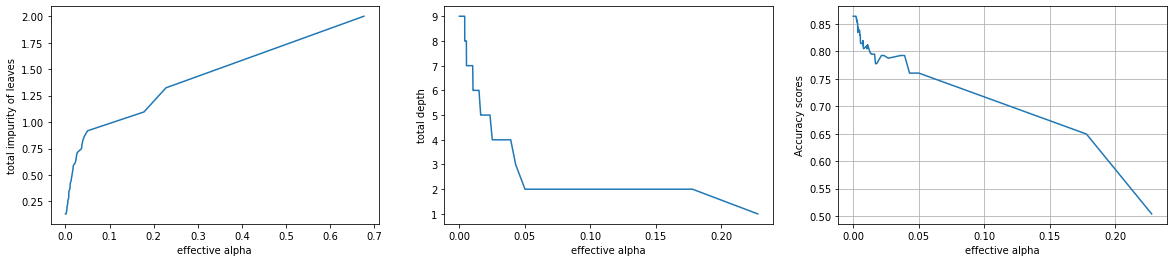

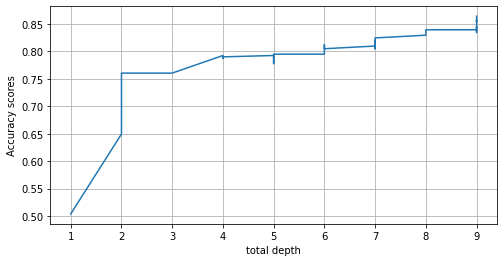

In [211]:
# Prune Tree with Best Parameters
train_size = int(0.8 * len(X))
X_train = deepcopy(X.loc[:train_size, features])
y_train = deepcopy(y.loc[:train_size])
X_test = deepcopy(X.loc[train_size:, features])
y_test = deepcopy(y.loc[train_size:])

dtc = DecisionTreeClassifier(random_state=0,
                             criterion = 'entropy',
                             max_depth = 10, min_samples_leaf = 5,
                             min_samples_split = 3)
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

_, ax = plt.subplots(1,3, figsize=(20, 4))
ax[0].plot(ccp_alphas, impurities)
ax[0].set_xlabel("effective alpha")
ax[0].set_ylabel("total impurity of leaves")


dtcs = []
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=0,
                                 criterion = 'entropy',
                                 max_depth = 10, min_samples_leaf = 5,
                                 min_samples_split = 3, ccp_alpha=ccp_alpha)
    dtc.fit(X_train, y_train)
    dtcs.append(dtc)



acc_scores = [dtc.score(X_test, y_test) for dtc in dtcs]
tree_depths = [dtc.tree_.max_depth for dtc in dtcs]

ax[1].plot(ccp_alphas[:-1], tree_depths[:-1])
ax[1].set_xlabel("effective alpha")
ax[1].set_ylabel("total depth")

plt.grid()
ax[2].plot(ccp_alphas[:-1], acc_scores[:-1])
ax[2].set_xlabel("effective alpha")
ax[2].set_ylabel("Accuracy scores")

_, ax = plt.subplots(1,1, figsize=(8, 4))
plt.grid()
ax.plot(tree_depths[:-1], acc_scores[:-1])
ax.set_xlabel("total depth")
ax.set_ylabel("Accuracy scores")


max_acc, opt_depth, opt_alpha, idx = 0, 0, 0, -1
for i in range(len(acc_scores)):
  if acc_scores[i]>max_acc:
    opt_depth = tree_depths[i]
    max_acc = acc_scores[i]
    opt_alpha = ccp_alphas[i]
    idx = i
print(max_acc, opt_depth, opt_alpha)
y_pred = dtcs[idx].predict(X_test)
p, r, f, s = precision_recall_fscore_support(y_test, y_pred, average=None)
print('Precision: ', round(np.mean(p), 4), p)
print('Recall: ', round(np.mean(r),4), r)
print('Fscore: ', round(np.mean(f),4), f)